In [1]:
pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=51eb339dcf775daebe7dfd62cd8d79fb3e117729052ba883e12e0d9222adf244
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia
Note: you may need to restart the kernel to use updated packages.


In [2]:
import wikipedia

# Set a custom user agent to comply with Wikipedia's policy
wikipedia.set_user_agent("My Wikipedia Scraping Bot (youremail@example.com)")

# List of Wikipedia page titles
page_titles = [
    "Machine learning",
    "Deep learning",
    "Natural language processing",
    "Recurrent neural network",
    "Convolutional neural network",
    "Artificial intelligence",
    "Data science",
    "Supervised learning",
    "Unsupervised learning",
    "Reinforcement learning",
    "Support vector machine",
    "Decision tree",
    "Neural network",
    "Gradient boosting",
    "Cluster analysis",  
    "Random forest",
    "Dimensionality reduction",
    "Computer vision",
    "Transfer learning",
    "Anomaly detection", 
]

# Dictionary to store page titles and their content
documents = {}

# Number of pages to fetch for each document topic
num_pages_per_topic = 10

# Fetch content for each page
for title in page_titles:
    try:
        # Fetch the page content
        pages = wikipedia.search(title, results=num_pages_per_topic, suggestion=False)

        # Store the title and content in the dictionary
        documents[title] = "\n".join([wikipedia.page(page).content for page in pages])
    except wikipedia.exceptions.PageError:
        print("Page '{}' does not exist.".format(title))
    except wikipedia.exceptions.DisambiguationError as e:
        print("Page '{}' is a disambiguation page. Skipping.".format(title))

# Combine all content into one string
all_content = "\n".join(documents.values())

# Print the combined content
print("Combined Content:")
print(all_content[:500])  # Print only the first 500 characters for demonstration

Page 'Machine learning' does not exist.
Page 'Artificial intelligence' does not exist.


/opt/conda/lib/python3.10/site-packages/wikipedia/wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /opt/conda/lib/python3.10/site-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


Page 'Data science' is a disambiguation page. Skipping.
Page 'Supervised learning' does not exist.
Page 'Unsupervised learning' does not exist.
Page 'Reinforcement learning' does not exist.
Page 'Support vector machine' does not exist.
Page 'Decision tree' does not exist.
Page 'Gradient boosting' does not exist.
Page 'Cluster analysis' does not exist.
Page 'Dimensionality reduction' does not exist.
Page 'Computer vision' does not exist.
Page 'Transfer learning' does not exist.
Page 'Anomaly detection' is a disambiguation page. Skipping.
Combined Content:
Deep learning is the subset of machine learning methods based on neural networks with representation learning. The adjective "deep" refers to the use of multiple layers in the network. Methods used can be either supervised, semi-supervised or unsupervised.
Deep-learning architectures such as deep neural networks, deep belief networks, recurrent neural networks, convolutional neural networks and transformers have been applied to fields 

In [3]:
len(all_content)

1468916

In [6]:
import re
import numpy as np
import nltk
import spacy

from spacy.cli import download
from spacy import load
import warnings

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [8]:
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet2022')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet2022 to /usr/share/nltk_data...
[nltk_data]   Package wordnet2022 is already up-to-date!


True

In [9]:
class preprocessing:
    def __init__(self,text):
        self.text=text
        self.words=None
    def clear(self):
        clean = re.compile('<.*?>')
        self.text =  re.sub(clean, '', self.text)
        self.text= re.sub(r"[^a-zA-Z]"," ",self.text)
        self.text = re.sub(r'\s+', ' ', self.text)
    def Normalization(self):
        self.text=self.text.lower()
#         print(self.text)
    def Tokenization(self):
        self.words = word_tokenize(self.text)
#         print(self.words)
    def del_stop_words(self):
        stop_words = set(stopwords.words('english'))
        self.words=[word for word in self.words if (word not in stop_words)]
        
    def stemming(self):
        stemmer = PorterStemmer()
        self.words = [stemmer.stem(word) for word in self.words]
    def unique_words(self):
        self.words = list(set(self.words))
        return self.words
    def return_string(self):
        return ' '.join(self.words)
    def del_char (self):
        self.words=[word for word in self.words if (len(word)>1)]
        return self.words

In [11]:
def clean_document (document):
    cleaner = preprocessing(document)
    cleaner.clear()
    cleaner.Tokenization()
    cleaner.Normalization()
    cleaner.del_stop_words()
    cleaner.stemming()
    cleaner.del_char()
    output = cleaner.return_string()
    return output

In [13]:
clear = clean_document(all_content)

In [15]:
clear[:1200]

'deep learn subset machin learn method base neural network represent learn the adject deep refer use multipl layer network method use either supervis semi supervis unsupervis deep learn architectur deep neural network deep belief network recurr neural network convolut neural network transform appli field includ comput vision speech recognit natur languag process machin translat bioinformat drug design medic imag analysi climat scienc materi inspect board game program produc result compar case surpass human expert perform earli form neural network inspir inform process distribut commun node biolog system particular human brain howev current neural network intend model brain function organ gener seen low qualiti model purpos overview most modern deep learn model base multi layer neural network convolut neural network transform although also includ proposit formula latent variabl organ layer wise deep gener model node deep belief network deep boltzmann machin fundament deep learn refer cl

In [17]:
words = set(clear.split())  # Unique characters in input text
words_to_indices = dict((c, i) for i, c in enumerate(words))  # Character to index mapping
indices_to_words = dict((i, c) for i, c in enumerate(words))  # Index to character mapping

In [19]:
indices_to_words

{0: 'vanish',
 1: 'pikim',
 2: 'recognit',
 3: 'unrecogniz',
 4: 'principl',
 5: 'worker',
 6: 'circl',
 7: 'yield',
 8: 'myoton',
 9: 'rose',
 10: 'stabl',
 11: 'demograph',
 12: 'agre',
 13: 'documentari',
 14: 'gop',
 15: 'hutter',
 16: 'contribut',
 17: 'found',
 18: 'reflect',
 19: 'pagerank',
 20: 'Is',
 21: 'FP',
 22: 'cpt',
 23: 'kaim',
 24: 'nomenclatur',
 25: 'fnn',
 26: 'textbf',
 27: 'molecul',
 28: 'ntl',
 29: 'judici',
 30: 'spark',
 31: 'piql',
 32: 'inequ',
 33: 'sora',
 34: 'clearforest',
 35: 'wiley',
 36: 'regul',
 37: 'protein',
 38: 'sentenc',
 39: 'varimax',
 40: 'instanc',
 41: 'pseudorandom',
 42: 'climat',
 43: 'elbow',
 44: 'ith',
 45: 'ventur',
 46: 'worth',
 47: 'brendan',
 48: 'scientif',
 49: 'kevin',
 50: 'semidefinit',
 51: 'stress',
 52: 'isequival',
 53: 'model',
 54: 'lain',
 55: 'choos',
 56: 'conflict',
 57: 'ssm',
 58: 'reram',
 59: 'instruct',
 60: 'target',
 61: 'electrochem',
 62: 'move',
 63: 'restat',
 64: 'stop',
 65: 'deepen',
 66: 'dietteri

In [21]:
len(indices_to_words)

5901

In [22]:
maxlen = 5  # Maximum length of input sequence
step = 3  # Step size for creating input sequences
sentences = []  # List to store input sequences
next_words = []  # List to store next words

In [24]:
corpus = clear.split()
corpus[:6]

['deep', 'learn', 'subset', 'machin', 'learn', 'method']

In [26]:
for i in range(0, len(corpus) - maxlen, step):
    sentences.append(corpus[i:i + maxlen])
    next_words.append(corpus[i + maxlen])


In [29]:
len(sentences)

78300

In [31]:
print("X_train : " , sentences[0] , "\nY_train : " , next_words[0])

X_train :  ['deep', 'learn', 'subset', 'machin', 'learn'] 
Y_train :  method


In [35]:
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
model = Word2Vec(sentences= sentences, vector_size=100, window=3, min_count=1, workers=4)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

In [37]:
sentences[0]

['deep', 'learn', 'subset', 'machin', 'learn']

In [40]:
word_vectors = model.wv
word_vector_list = []
x=[]
for sentence in sentences:
    sentence_vectors = [word_vectors[word] for word in sentence if word in word_vectors]
    x.append(sentence_vectors)

print(len(x))
print(len(x[0]))

word_vectors = model.wv
word_vector_list = []
y=[]
for sentence in next_words:
    sentence_vectors = [word_vectors[sentence] if sentence in word_vectors else None]
    y.append(sentence_vectors)

print(len(y))
print(len(y[0]))


78300
5
78300
1


In [42]:
y = np.array(y)
x = np.array(x)

In [44]:
print(x.shape)
print(y.shape)

(78300, 5, 100)
(78300, 1, 100)


In [46]:
x_words = np.zeros((len(sentences), maxlen, len(words)), dtype=bool)  # Initialize input data tensor
y_words = np.zeros((len(sentences), len(words)), dtype=bool)  # Initialize target data tensor

In [48]:
for i, sentence in enumerate(sentences):
    for t, word in enumerate(sentence):
        x_words[i, t, words_to_indices[word]] = 1
    y_words[i, words_to_indices[next_words[i]]] = 1

In [50]:
print(x_words.shape)
print(y_words.shape)

(78300, 5, 5901)
(78300, 5901)


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_words, test_size=0.2, random_state=42)

In [54]:
import tensorflow as tf 
from tensorflow.keras.layers import LSTM, Dense

In [55]:
word_vectors[0].shape[0]

100

In [56]:
x[0].shape[0]

5

In [58]:
from tensorflow.keras.layers import Dense, SimpleRNN


In [59]:
import tensorflow as tf

model_rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, return_sequences=True, input_shape=(maxlen, word_vectors[0].shape[0])),
    tf.keras.layers.Dropout(0.2),  # Adding dropout after the LSTM layer
    tf.keras.layers.LSTM(128, return_sequences=True),  # Adding LSTM layer with return_sequences=True
    tf.keras.layers.LSTM(128),  # Adding another LSTM layer without return_sequences=True
    tf.keras.layers.Dropout(0.2),  # Adding dropout after the LSTM layer
    tf.keras.layers.Dense(len(words), activation='softmax')
])

model_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_rnn.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 5, 128)         │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 5, 128)         │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5901)           │       761,229 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,053,709 (4.02 MB)

 Trainable params: 1,053,709 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
history = model_rnn.fit(x_train, y_train, epochs=100 , validation_data=(x_test , y_test))

Epoch 1/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.1532 - loss: 4.8811 - val_accuracy: 0.1393 - val_loss: 5.4432
Epoch 2/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.1816 - loss: 4.6307 - val_accuracy: 0.1624 - val_loss: 5.2731
Epoch 3/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2118 - loss: 4.3925 - val_accuracy: 0.1779 - val_loss: 5.1351
Epoch 4/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2440 - loss: 4.2084 - val_accuracy: 0.2003 - val_loss: 5.0024
Epoch 5/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2670 - loss: 4.0146 - val_accuracy: 0.2178 - val_loss: 4.8842
Epoch 6/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.2906 - loss: 3.8656 - val_accuracy: 0.2333 - val_loss: 4.7695
Epoch 7/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.3097 - loss: 3.7198 - val_accuracy: 0.2540 - val_loss: 4.6729
Epoch 8/100
1958/1958 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 

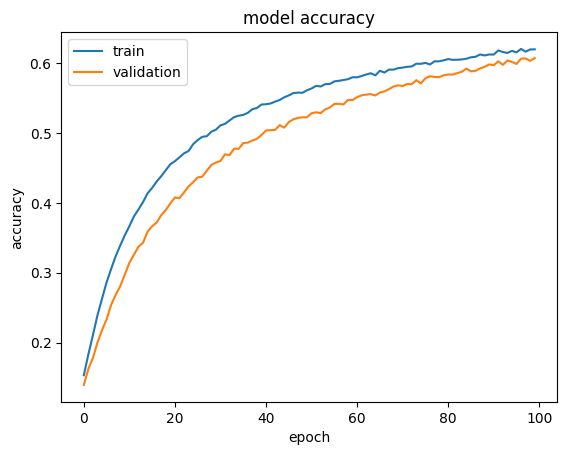

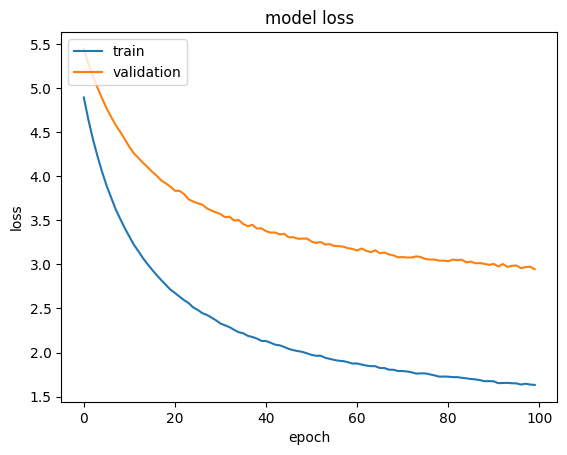

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [63]:
loss, accuracy = model_rnn.evaluate(x_test,y_test)
print('Testing Accuracy is {} '.format(accuracy*100))

490/490 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5990 - loss: 2.9726
Testing Accuracy is 60.74073910713196 


In [ ]:
import numpy as np

def predict_next_word(model, input_sequence, num_words_to_predict, words_to_indices, indices_to_words):
    # Tokenize and preprocess the input sequence
    processed_input = clean_document(input_sequence)  # Assuming clean_document function is defined
    tokenized_input = processed_input.split()
    
    # Initialize the input sequence
    current_sequence = [words_to_indices[word] for word in tokenized_input if word in words_to_indices]
    
    # Ensure the current sequence has the correct length
    while len(current_sequence) < maxlen:
        current_sequence.insert(0, 0)  # Padding with zeros (or any other padding token)
    
    # Predict words iteratively
    predicted_words = []
    for _ in range(num_words_to_predict):
        x_pred = np.zeros((1, maxlen, len(words_to_indices)))
        for t, index in enumerate(current_sequence[-maxlen:]):
            if index != 0:  # Ignore padding
                x_pred[0, t, index] = 1

        # Predict the next word
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_word = indices_to_words[next_index]
        
        predicted_words.append(next_word)
        
        # Update the input sequence
        current_sequence.append(next_index)
        current_sequence.pop(0)
    
    return predicted_words

# Define the initial input sequence
input_sequence = "machine learn"

# Predict the next 10 words
predicted_words = predict_next_word(model_rnn, input_sequence, 10, words_to_indices, indices_to_words)

# Print the predicted words
print(" ".join(predicted_words))


# # # **SimpleRNN**

In [66]:
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

# Define the SimpleRNN model with the specified architecture
model_simple_rnn = Sequential([
    SimpleRNN(256, return_sequences=True, input_shape=(maxlen, len(words)),
              dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    SimpleRNN(256, return_sequences=True, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    SimpleRNN(256, dropout=0.2, recurrent_dropout=0.2, kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(len(words), activation='softmax')
])

model_simple_rnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_simple_rnn.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 5, 256)         │     1,576,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 5, 256)         │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5901)           │     1,516,557 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,355,661 (12.80 MB)

 Trainable params: 3,355,661 (12.80 MB)

 Non-trainable params: 0 (0.00 B)

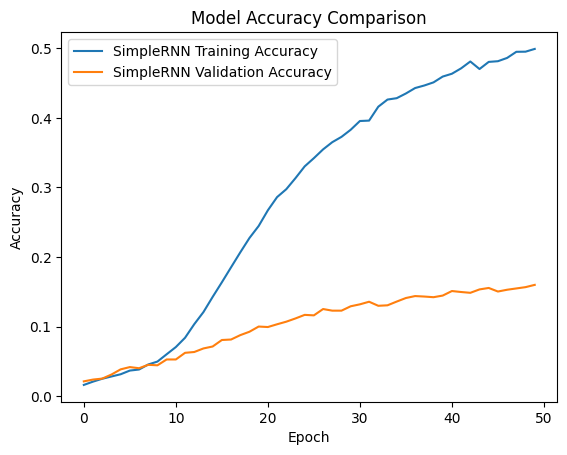

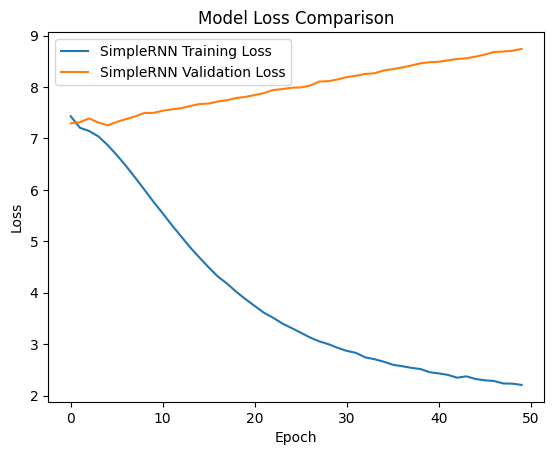

In [40]:
import matplotlib.pyplot as plt
history_simple_rnn = model_simple_rnn.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Plot training and validation accuracy for the SimpleRNN model
plt.plot(history_simple_rnn.history['accuracy'], label='SimpleRNN Training Accuracy')
plt.plot(history_simple_rnn.history['val_accuracy'], label='SimpleRNN Validation Accuracy')

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and validation loss for the SimpleRNN model
plt.plot(history_simple_rnn.history['loss'], label='SimpleRNN Training Loss')
plt.plot(history_simple_rnn.history['val_loss'], label='SimpleRNN Validation Loss')

plt.title('Model Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# # # Predictions

In [67]:
import numpy as np

def predict_next_word(model, input_sequence, num_words_to_predict, words_to_indices, indices_to_words):
    # Tokenize and preprocess the input sequence
    processed_input = clean_document(input_sequence)  # Assuming clean_document function is defined
    tokenized_input = processed_input.split()
    
    # Initialize the input sequence
    current_sequence = [words_to_indices[word] for word in tokenized_input if word in words_to_indices]
    
    # Ensure the current sequence has the correct length
    while len(current_sequence) < maxlen:
        current_sequence.insert(0, 0)  # Padding with zeros (or any other padding token)
    
    # Predict words iteratively
    predicted_words = []
    for _ in range(num_words_to_predict):
        x_pred = np.zeros((1, maxlen, len(words_to_indices)))
        for t, index in enumerate(current_sequence[-maxlen:]):
            if index != 0:  # Ignore padding
                x_pred[0, t, index] = 1

        # Predict the next word
        preds = model.predict(x_pred, verbose=0)[0]
        next_index = np.argmax(preds)
        next_word = indices_to_words[next_index]
        
        predicted_words.append(next_word)
        
        # Update the input sequence
        current_sequence.append(next_index)
        current_sequence.pop(0)
    
    return predicted_words

# Define the initial input sequence
input_sequence = "machine learn"

# Predict the next 10 words
predicted_words = predict_next_word(model_simple_rnn, input_sequence, 10, words_to_indices, indices_to_words)

# Print the predicted words
print(" ".join(predicted_words))


I0000 00:00:1716062254.126576     228 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


proprietari countri preappend ES whiten acoust manag athen volum bengio
